<div align='center'>

# Partial Differential Equations (PDEs)

### Part of Scientific-ML-Notes 

[![GitHub](https://img.shields.io/badge/GitHub-Repository-black?logo=github&scale=5)](https://github.com/mhnaderi/Scientific-ML-Notes)

---

In [1]:
# Always run this cell first to import all necessary libraries and to set up the notebook environment

# Import standard libraries
import numpy as np
import scipy as sp
import numpy.linalg as la
import scipy.sparse as sps
import warnings
import matplotlib.pyplot as plt

# Import JAX for numerical computations
import jax
import jax.numpy as jnp
jax.config.update("jax_enable_x64", True)

# Import utility functions
from tqdm import trange

# Suppress warnings
warnings.filterwarnings("ignore")

# Configure Matplotlib for inline plotting and LaTeX-style text rendering
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams.update({"font.family": "serif"})
plt.rcParams.update({"figure.facecolor": 'white', "axes.facecolor": 'white'})

# Partial Differential Equations (PDEs)

Second-order linear partial differential equations can be categorized based on the discriminant of their second-order derivative terms. The general form of such a PDE is:

$$
a\, u_{xx} + b\, u_{xy} + c\, u_{yy} + d\, u_x + e\, u_y + f\, u + g = 0,
$$

where $a$, $b$, $c$, $d$, $e$, $f$, and $g$ are coefficients that may depend on the independent variables, and $u$ is the unknown function.

The discriminant $\Delta = b^2 - 4ac$ determines the classification:

$$
\begin{array}{ll}
\Delta > 0: & \text{Hyperbolic (e.g., the wave equation)} \\
\Delta = 0: & \text{Parabolic (e.g., the heat equation)} \\
\Delta < 0: & \text{Elliptic\quad\ (e.g., Laplace's equation)}
\end{array}
$$

### Hyperbolic PDEs

Hyperbolic equations describe time-dependent processes involving wave propagation or convection that are not settling toward a steady state. These systems are **conservative**, meaning the total "energy"—measured by an appropriate norm of the solution—is conserved over time. Mathematically, hyperbolic PDEs resemble linear ODE systems with purely imaginary eigenvalues, leading to oscillatory solutions that neither grow nor decay.

Key characteristics of hyperbolic PDEs include:

- **Finite propagation speed**: Information and disturbances propagate at finite speeds.
- **Development of discontinuities**: Even with smooth initial data, solutions can develop steep fronts or shocks.
- **Time-reversibility**: The equations are, in principle, reversible in time.

### Parabolic PDEs

Parabolic equations model time-dependent, **dissipative** processes such as diffusion, where systems evolve toward equilibrium. They are analogous to linear ODE systems with eigenvalues having negative real parts, resulting in solutions that decay exponentially over time.

Important features of parabolic PDEs include:

- **Instantaneous propagation**: Theoretically, disturbances affect the entire domain instantly.
- **Smoothing effect**: Irregularities in initial conditions are smoothed out as time progresses.
- **Irreversibility**: The equations are not reversible in time; for example, solving the heat equation backward in time is ill-posed.

### Elliptic PDEs

Elliptic equations govern systems in a steady state or equilibrium and are thus time-independent. Solutions typically represent spatial distributions, like potential fields in electrostatics or steady-state temperature profiles.

### Numerical Challenges

When numerically solving parabolic or hyperbolic PDEs, challenges similar to those in stiff ODEs arise:

- **Parabolic PDEs**: The presence of eigenvalues with large negative real parts leads to stiffness, requiring implicit methods or very small time steps for stability.
- **Hyperbolic PDEs**: Large imaginary eigenvalues cause rapid oscillations, necessitating careful discretization to capture wave propagation accurately without introducing numerical dispersion or instability.

### Boundary Conditions

Specifying appropriate boundary conditions is essential for well-posed PDE problems. Common types include:

- **Dirichlet Boundary Condition**: The solution $u$ is prescribed on the boundary.
- **Neumann Boundary Condition**: The normal derivative of the solution (e.g., $u_x$ or $u_y$) is specified on the boundary.
- **Robin Boundary Condition**: A linear combination of the solution and its derivative is specified, typically of the form $\alpha u + \beta \dfrac{\partial u}{\partial n} = \gamma$ on the boundary, where $\alpha$, $\beta$, and $\gamma$ are given functions or constants.

These boundary conditions can be applied to the entire boundary or specific portions, depending on the physical problem and domain geometry.

# Initial Value Problems (IVPs)

## Finite Difference Method

Finite difference methods involve discretizing the interval of integration by introducing a mesh of points. Within this mesh, derivatives present in the ordinary differential equation (ODE) or boundary conditions are approximated using finite differences. The resulting system of algebraic equations can be linear or nonlinear, depending on whether the function $ f $ is linear or nonlinear in $ u $ and $ u' $. If the system is nonlinear, iterative methods like Newton's method are used to solve it.

In many cases, each equation in the system depends only on a few adjacent unknowns—often just three. This leads to matrices that are tridiagonal in the linear case or have sparse Jacobians in the nonlinear case. Such sparsity significantly reduces computational effort and storage requirements compared to solving general dense systems of equations. **Finite difference methods typically yield sparse matrices because each equation involves only variables at nearby mesh points.**

### Example: The Advection-Diffusion Equation

Consider the advection-diffusion equation:

$$
\frac{\partial u}{\partial t} + c\, \frac{\partial u}{\partial x} = \nu\, \frac{\partial^2 u}{\partial x^2},
$$

where:
- $ c $ is the advection speed,
- $ \nu $ is the diffusion coefficient.

We discretize the spatial domain by defining mesh points:

$$
x_i = i\, \Delta x, \quad i = 0, 1, \ldots, n-1,
$$

where $ \Delta x = \dfrac{1}{n - 1} $. The spatial derivatives are approximated using finite differences:

**First derivative:**

$$
\frac{\partial u(t, x_i)}{\partial x} \approx \frac{u(t, x_{i+1}) - u(t, x_{i-1})}{2\, \Delta x}.
$$

**Second derivative:**

$$
\frac{\partial^2 u(t, x_i)}{\partial x^2} \approx \frac{u(t, x_{i+1}) - 2\, u(t, x_i) + u(t, x_{i-1})}{\Delta x^2}.
$$

Substituting these approximations into the PDE transforms it into a system of ODEs. To solve this system, we need boundary conditions $ u_0(t) $ and $ u_{n-1}(t) $, as well as initial conditions $ u_i(0) $ for $ i = 0, 1, \ldots, n-1 $.

### Incorporating Periodic Boundary Conditions

Assuming **periodic boundary conditions**, we have:

- $ x_{-1} = x_{n-1} $ (the point to the left of $ x_0 $ is $ x_{n-1} $),
- $ x_{n} = x_0 $ (the point to the right of $ x_{n-1} $ is $ x_0 $).

This allows us to consistently apply the finite difference approximations at the boundaries.

### Matrix Representation

The system of ODEs can be expressed in matrix form:

$$
\frac{d\boldsymbol{u}}{dt} = \left( -c\, \boldsymbol{D}_1 + \nu\, \boldsymbol{D}_2 \right) \boldsymbol{u} = \boldsymbol{A}\, \boldsymbol{u},
$$

where $ \boldsymbol{u} $ is the vector $ [u_0(t), u_1(t), \ldots, u_{n-1}(t)]^\top $, and:

**First derivative matrix $ \boldsymbol{D}_1 $:**

$$
\boldsymbol{D}_1 = \frac{1}{2\, \Delta x}
\begin{bmatrix}
0 & 1 & 0 & \cdots & -1 \\
-1 & 0 & 1 & \cdots & 0 \\
0 & -1 & 0 & \ddots & \vdots \\
\vdots & \ddots & \ddots & \ddots & 0 \\
1 & \cdots & 0 & -1 & 0
\end{bmatrix}.
$$

**Second derivative matrix $ \boldsymbol{D}_2 $:**

$$
\boldsymbol{D}_2 = \frac{1}{\Delta x^2}
\begin{bmatrix}
-2 & 1 & 0 & \cdots & 1 \\
1 & -2 & 1 & \ddots & \vdots \\
0 & 1 & -2 & \ddots & 0 \\
\vdots & \ddots & \ddots & \ddots & 1 \\
1 & \cdots & 0 & 1 & -2
\end{bmatrix}.
$$

The overall matrix $ \boldsymbol{A} = -c\, \boldsymbol{D}_1 + \nu\, \boldsymbol{D}_2 $ is both **Toeplitz** (constant along diagonals) and **circulant** (each row is a cyclic shift of the row above). This means the entries $ a_{ij} $ depend only on $ (i - j) \mod n $, and the diagonals "wrap around" the matrix.

### Stiffness of the ODE System

The eigenvalues of the matrix $ \boldsymbol{A} $ can be shown to range approximately between:

$$
\lambda_{\text{min}} \approx -\frac{4\, \nu}{\Delta x^2}, \quad \lambda_{\text{max}} \approx \frac{4\, \nu}{\Delta x^2}.
$$

As the spatial mesh size $ \Delta x $ becomes smaller (i.e., as the mesh is refined), these eigenvalues can become very large in magnitude. This leads to **stiffness** in the ODE system, which is a common characteristic of semi-discretized PDEs. When dealing with stiff ODEs, appropriate numerical methods must be chosen for time integration to ensure stability and efficiency.

### Key Properties for Convergence

For the approximate solution to converge to the true solution of the PDE as the time and space step sizes tend to zero, the finite difference scheme must satisfy:

- **Consistency**: The local truncation error must approach zero as $ \Delta x $ and $ \Delta t $ go to zero.

- **Stability**: The approximate solution remains bounded at any fixed time $ t $.

### The CFL Condition

For **explicit finite difference schemes** applied to hyperbolic PDEs to be stable, they must satisfy the **Courant-Friedrichs-Lewy (CFL) condition**. The CFL condition ensures that the numerical domain of dependence encompasses the physical domain of dependence of the PDE. In essence, this means that information must propagate through the numerical grid at least as rapidly as it does in the actual continuous system.

## Method of Lines

The **Method of Lines** is an effective technique for solving time-dependent partial differential equations (PDEs). By discretizing the spatial variables—using methods such as spectral methods, finite differences, or finite elements—the PDE is transformed into a coupled system of ordinary differential equations (ODEs) in time. This system can then be integrated using standard ODE solvers like Euler's method, Leapfrog, Adams-Bashforth, or Runge-Kutta methods.

When employing spectral methods to solve time-dependent PDEs numerically, the typical approach involves:

- **Spectral Differentiation in Space**: Spatial derivatives are approximated using spectral methods, which provide high accuracy due to their ability to capture global behavior with fewer degrees of freedom.
- **Finite Differences in Time**: Time integration is performed using finite difference schemes of various orders.

Although spectral methods offer exponential convergence in space for smooth problems, the time integration step is often handled by lower-order finite difference methods. In theory, this could reduce the overall spectral accuracy. However, in practice, using sufficiently small time steps with time-stepping schemes of order two or higher often yields satisfactory global accuracy. The rationale is that reducing the time step size can minimize the total error introduced during integration.

Small time steps are generally more computationally feasible than refining the spatial discretization:

- **Computational Effort**: Decreasing the time step size affects computation time linearly, without significantly increasing memory requirements.
- **Storage Requirements**: Halving the spatial step size in $ d $ dimensions typically increases storage needs by a factor of $ 2^d $ and may increase computation time per step by $ 2^d $ to $ 2^{3d} $, depending on the complexity of the linear algebra operations involved.

In finite difference and finite element methods, numerical instabilities are often induced by discretization errors. These errors can propagate and amplify, leading to unstable solutions if not properly managed. On the other hand, spectral methods produce discretization errors that are typically so small—due to their high-order accuracy—that round-off errors from finite precision arithmetic can become significant. In some cases, these round-off errors may affect the stability and accuracy of the computed solution.

In [2]:
def chebdif(N, M):
    """
    Chebyshev differentiation matrix up to max order M. 
    args:
       `M`: max order of differentiation
       `N`: number of nodes (should be n in our notation)
    return:   
       `D`: numpy array of shape (M,N,N)
    """
    if M >= N: raise Exception('numer of nodes must be greater than M')        
    if M <= 0: raise Exception('derivative order must be at least 1')

    DM = np.zeros((M,N,N))    
    
    n1 = int(np.floor(N/2)); n2 = int(np.ceil(N/2))    # indices used for flipping trick [Corrected]
    k  = np.arange(N)                                   # compute theta vector
    th = k*np.pi/(N-1)    

    # Compute the Chebyshev points
    x = np.sin(np.pi*((N-1)-2*np.linspace(N-1,0,N))/(2*(N-1)))   # W&R way
    x = x[::-1]
    
    # Assemble the differentiation matrices
    T = np.tile(th/2,(N,1))
    DX = 2*np.sin(T.T+T)*np.sin(T.T-T)               # trigonometric identity
    DX[n1:,:] = -np.flipud(np.fliplr(DX[0:n2,:]))    # flipping trick
    DX[range(N),range(N)] = 1.                       # diagonals of D
    DX = DX.T

    C = sp.linalg.toeplitz((-1.)**k)     # matrix with entries c(k)/c(j)
    C[ 0,:] *= 2
    C[-1,:] *= 2
    C[:, 0] *= 0.5
    C[:,-1] *= 0.5

    Z = 1./DX                        # Z contains entries 1/(x(k)-x(j))
    Z[range(N),range(N)] = 0.        # with zeros on the diagonal.          

    D = np.eye(N)                    # D contains differentiation matrices.
    for ell in range(M):
        D = (ell+1)*Z*(C*np.tile(np.diag(D),(N,1)).T - D)  # off-diagonals    
        D[range(N),range(N)] = -np.sum(D,axis=1)           # negative sum trick
        DM[ell,:,:] = D                                    # store current D in DM
    return x, DM

100%|██████████| 10000/10000 [00:00<00:00, 60603.18it/s]


Text(0, 0.5, '$t$')

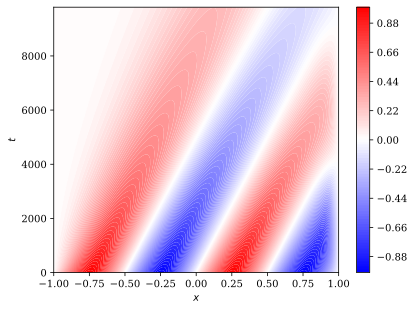

In [3]:
## 1D Advection-Diffusion Equation Solver using FDM and Spectral Methods with EE, RK4, and IE time integration schemes

# Parameters
c, nu = 1, 0.05
Xmin, Xmax = -1, 1
N = 2**8
dt = 1e-4
Tf = 1
TIS = "EE"  # Time Integration Scheme: "EE", "RK4", "IE"

save_iter = round(Tf / dt) // 50

## Finite Difference Method
x = np.linspace(Xmin, Xmax, N)
dx = x[1] - x[0]
D1 = (-np.eye(N, k=-1) + np.eye(N, k=1)) / (2 * dx)
D2 = (np.eye(N, k=-1) - 2 * np.eye(N) + np.eye(N, k=1)) / (dx**2)
D1[0, -1], D1[-1, 0] = -1 / (2 * dx), 1 / (2 * dx)
D2[0, -1], D2[-1, 0] = 1 / (dx**2), 1 / (dx**2)
L_FD = -c * D1 + nu * D2

## Spectral Method
x_, DM = chebdif(N, 2)
L_SP = -c * DM[0] + nu * DM[1]

# Right-hand side function
RHS = lambda u: L_FD @ u

# Solver function
def Solve(u):
    if TIS == "EE":
        F1 = RHS(u)
        u += dt * F1

    elif TIS == "RK4":
        F1 = RHS(u)
        F2 = RHS(u + 0.5 * dt * F1)
        F3 = RHS(u + 0.5 * dt * F2)
        F4 = RHS(u + dt * F3)
        u += dt * (F1 + 2 * F2 + 2 * F3 + F4) / 6

    elif TIS == "IE":
        const = u.copy()
        du = jax.numpy.ones_like(u)

        while (la.norm(du) / N) > 1e-8:
            R = const - u + dt * RHS(u)
            fAx = lambda x: x - dt * jax.jvp(RHS, (u,), (x,))[1]
            du = jax.scipy.sparse.linalg.bicgstab(fAx, R)[0]
            u += du

    # Boundary Conditions
    u[0], u[-1] = 0, 0

    return u

# Initial condition
u = np.sin(2 * np.pi * x)

# Time-stepping loop
lu, lt = [u.copy()], [0]
for i in trange(int(Tf / dt)):
    u = Solve(u)
    if i % save_iter == 0:
        lt.append(i * (dt + 1))
        lu.append(u.copy())

# Plot the results
X, T = np.meshgrid(x, np.array(lt))
plt.contourf(X, T, np.array(lu), 100, cmap='bwr')
plt.colorbar()
plt.xlabel('$x$')
plt.ylabel('$t$')

Text(0.5, 1.0, 'Eigenvalues of RHS (SP)')

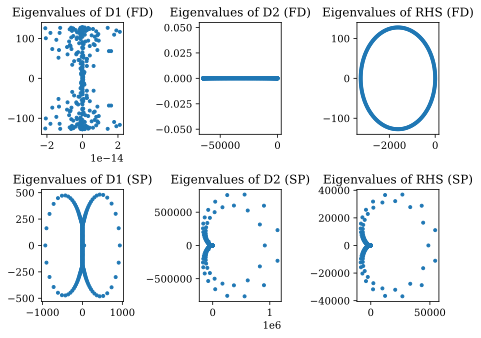

In [4]:
# Plot eigenvalues of differentiation matrices

# Compute eigenvalues for Finite Difference (FD) method
eigvals_FD_D1 = np.linalg.eigvals(D1)
eigvals_FD_D2 = np.linalg.eigvals(D2)
eigvals_FD_RHS = np.linalg.eigvals(-c * D1 + nu * D2)

# Compute eigenvalues for Spectral (SP) method
eigvals_SP_D1 = np.linalg.eigvals(DM[0])
eigvals_SP_D2 = np.linalg.eigvals(DM[1])
eigvals_SP_RHS = np.linalg.eigvals(-c * DM[0] + nu * DM[1])

# Create subplots
fig, axs = plt.subplots(2, 3, tight_layout=True)

# Plot eigenvalues for FD method
axs[0, 0].plot(eigvals_FD_D1.real, eigvals_FD_D1.imag, '.')
axs[0, 0].set_title('Eigenvalues of D1 (FD)')
axs[0, 1].plot(eigvals_FD_D2.real, eigvals_FD_D2.imag, '.')
axs[0, 1].set_title('Eigenvalues of D2 (FD)')
axs[0, 2].plot(eigvals_FD_RHS.real, eigvals_FD_RHS.imag, '.')
axs[0, 2].set_title('Eigenvalues of RHS (FD)')

# Plot eigenvalues for SP method
axs[1, 0].plot(eigvals_SP_D1.real, eigvals_SP_D1.imag, '.')
axs[1, 0].set_title('Eigenvalues of D1 (SP)')
axs[1, 1].plot(eigvals_SP_D2.real, eigvals_SP_D2.imag, '.')
axs[1, 1].set_title('Eigenvalues of D2 (SP)')
axs[1, 2].plot(eigvals_SP_RHS.real, eigvals_SP_RHS.imag, '.')
axs[1, 2].set_title('Eigenvalues of RHS (SP)')

In [5]:
## Computation of FDM using sparse matrices and 1.LU decomposition, 2.Sparse solver, 3.BiCGStab

# Create the differentiation matrices
D1 = sps.diags([-1, 0, 1], [-1, 0, 1], shape=(N, N), format='lil') / (2 * dx)
D2 = sps.diags([1, -2, 1], [-1, 0, 1], shape=(N, N), format='lil') / (dx**2)

# Set the boundary conditions
D1[0, -1], D1[-1, 0] = -1 / (2 * dx), 1 / (2 * dx)
D2[0, -1], D2[-1, 0] = 1 / (dx**2), 1 / (dx**2)

# Convert to CSC format for efficient arithmetic and matrix vector operations
D1, D2 = D1.tocsc(), D2.tocsc()

# Define the sparse matrix for the linear operator
L_Sparse = -c * D1 + nu * D2

# Define the RHS function
RHS = lambda u: L_Sparse @ u

# Define the matrix A for implicit methods
A = sps.eye(N) - dt * L_Sparse
lu, piv = sp.linalg.lu_factor(A.todense())

# Solver function
def Solve(u):
    if TIS == "EE":
        F1 = RHS(u)
        u += dt * F1

    elif TIS == "RK4":
        F1 = RHS(u)
        F2 = RHS(u + 0.5 * dt * F1)
        F3 = RHS(u + 0.5 * dt * F2)
        F4 = RHS(u + dt * F3)
        u += dt * (F1 + 2 * F2 + 2 * F3 + F4) / 6

    elif TIS == "IE":
        const = u.copy()
        du = np.ones_like(u)

        while (la.norm(du) / N) > 1e-12:
            R = const - u + dt * RHS(u)
            # du = sp.linalg.lu_solve((lu, piv), R) # 1. Solve using LU decomposition
            # du = sp.linalg.spsolve(A, R)[0]       # 2. Solve using sparse solver
            du = sp.linalg.bicgstab(A, R)[0]        # 3. Solve using BiCGStab
            u += du

    # Boundary Conditions
    u[0], u[-1] = 0, 0

    return u

# Initial condition
u = np.sin(2 * np.pi * x)

# Time-stepping loop
lu, lt = [u.copy()], [0]
for i in trange(int(Tf / dt)):
    u = Solve(u)
    if i % save_iter == 0:
        lt.append(i * (dt + 1))
        lu.append(u.copy())

# Uncomment to plot the results
# X, T = np.meshgrid(x, np.array(lt))
# plt.contourf(X, T, np.array(lu), 100, cmap='bwr')
# plt.colorbar()
# plt.xlabel('$x$')
# plt.ylabel('$t$')

100%|██████████| 10000/10000 [00:00<00:00, 137029.35it/s]


## Exact Solutions of Linear Systems of Differential Equations

Consider a linear system of coupled differential equations:

$$
\frac{d\mathbf{u}}{dt} = \mathbf{L} \mathbf{u}
$$

where $\mathbf{u}$ is a vector of variables and $\mathbf{L}$ is a constant matrix.

The exact solution to this system is given by:

$$
\mathbf{u}(t) = \exp(\mathbf{L} t) \mathbf{u}(0)
$$

Alternatively, we can define the evolution operator $\mathbf{A}$ as:

$$
\mathbf{A} = \exp(\mathbf{L} \Delta t)
$$

This operator $\mathbf{A}$, sometimes called the autoregressive operator, advances the system by a time step $\Delta t$:

$$
\mathbf{u}(t + \Delta t) = \mathbf{A} \mathbf{u}(t)
$$

In [6]:
### Computation of FDM using matrix exponential with dense and sparse matrices

# Compute the matrix exponential for the dense matrix
expm_L = sp.linalg.expm(L_FD * dt)
## Uncomment the following line to use the sparse matrix exponential
# expm_L = sp.sparse.linalg.expm(L_Sparse * dt)

# Initial condition
u = np.sin(2 * np.pi * x)

# Time-stepping loop
lu, lt = [u.copy()], [0]
for i in trange(int(Tf / dt)):
    u = expm_L @ u
    if i % save_iter == 0:
        lt.append(i * (dt + 1))
        lu.append(u.copy())

# Uncomment to plot the results
# X, T = np.meshgrid(x, np.array(lt))
# plt.contourf(X, T, np.array(lu), 100, cmap='bwr')
# plt.colorbar()
# plt.xlabel('$x$')
# plt.ylabel('$t$')
# plt.title('Exact Solution with Matrix Exponential')

100%|██████████| 10000/10000 [00:00<00:00, 28475.67it/s]


## Stiffness and Stability in Numerical Methods

### Understanding Stiffness

**Rule of Thumb for Stiffness**:

A system is considered **stiff** if it has eigenvalues with significantly different magnitudes, especially when some eigenvalues are much larger in magnitude than others. This often leads to numerical difficulties because standard explicit time-stepping methods require prohibitively small time steps for stability.

To assess stiffness, one common approach is to examine the eigenvalues of the Jacobian matrix (in the case of ODEs) or the discretized spatial operator (for PDEs). If the eigenvalues span a wide range in the complex plane, indicating large disparities in their real parts (or in both real and imaginary parts), the problem is likely stiff. Conversely, if the eigenvalues are clustered closely together, the system is likely non-stiff and can be handled effectively with non-stiff numerical methods.

### Ensuring Stability

**Rule of Thumb for Stability**:

In the Method of Lines (MOL) approach for solving PDEs, the stability of the time-integration scheme depends on the eigenvalues of the spatial discretization operator. For stability, the eigenvalues of the (linearized) spatial discretization operator, when multiplied by the time step size $\Delta t$, should reside within the stability region of the chosen time-integration method.

However, this rule of thumb may not always be reliable, particularly for discretization matrices that are not normal (i.e., matrices whose eigenvectors are not orthogonal). In such cases, the pseudospectra of the matrix become important. For non-normal matrices, a more accurate condition is that the $\epsilon$-pseudospectrum must lie within the stability region of the time-integration method, allowing for a margin that depends on $\epsilon$ and $\Delta t$ as they approach zero:

$$
\text{distance to stability boundary} = O(\epsilon) + O(\Delta t)
$$

When dealing with non-normal operators, it's advisable to examine the pseudospectra by analyzing the eigenvalues of slightly perturbed versions of the matrix. This can provide insights into potential stability issues that are not evident from the eigenvalues alone. Despite these complexities, for many practical problems, the basic rule of thumb provides a reasonable guideline.

### Sources of Stiffness

- **Spatial Discretization Methods**: Certain spatial discretization techniques can introduce stiffness into the numerical problem. For example, high-order methods or those that capture fine spatial details (like spectral methods) can generate discretization matrices with widely varying eigenvalues, leading to stiffness. This occurs because resolving high-frequency modes accurately may require smaller time steps for stability.

- **Physical Phenomena**: The inherent properties of the physical system being modeled can cause stiffness. Phenomena involving rapid transients or processes with vastly different time scales (such as chemical reactions in combustion, which involve both fast and slow dynamics) often result in stiff equations due to the presence of both slow and fast modes.

- **Numerical Dissipation and Dispersion**: Numerical schemes that introduce artificial diffusion or dispersion can sometimes exacerbate stiffness. While some amount of numerical dissipation can stabilize a computation, excessive dissipation may dampen important solution components and necessitate smaller time steps to maintain accuracy.

- **Fine Spatial Resolution**: Using a large number of grid points or a very fine mesh increases the stiffness of the numerical problem. Finer discretization leads to higher-frequency modes in the spatial discretization operator, which can have large eigenvalues. As a result, explicit time-stepping methods may require impractically small time steps for stability, making implicit methods or specialized integrators more suitable.

## Boundary Conditions in Initial Value Problems

### Dirichlet Boundary Conditions

Dirichlet boundary conditions specify the values of the solution at the domain boundaries. For example:

$$
u(0) = 0 \quad \text{and} \quad u(1) = 0
$$

These conditions can be implemented in numerical methods using two approaches:

1. **Modifying the Discretization Operator**:

   Set the first and last rows of the spatial discretization operator (matrix) to zero. Since the boundary values are fixed at zero and the solution evolves according to the operator, this ensures that the solution remains zero at the boundaries throughout the simulation. This method is straightforward but is primarily suitable when there are no forcing terms or source terms affecting the boundaries.

2. **Explicitly Setting Boundary Values**:

   Directly enforce the boundary values in the solution vector at each time step. After computing the solution update, overwrite the first and last elements of the solution vector with the specified boundary values. This method guarantees that the boundary conditions are satisfied exactly, regardless of any forcing terms or nonlinearities in the equations.

### Neumann Boundary Conditions

Neumann boundary conditions specify the gradient (derivative) of the solution at the boundaries. For instance:

$$
\left. \frac{\partial u}{\partial x} \right|_{x=0} = 0 \quad \text{and} \quad \left. \frac{\partial u}{\partial x} \right|_{x=1} = 0
$$

These conditions imply that the solution has a flat slope at the boundaries. Implementing Neumann boundary conditions can be done in the following ways:

1. **Adjusting the Discretization Matrix**:

   Modify the first and last rows of the spatial discretization matrix to represent the derivative conditions. Using finite difference approximations, the zero-gradient condition at the boundary can be expressed. For example, a central difference approximation at the left boundary leads to:

   $$
   \frac{u_1 - u_{-1}}{2 \Delta x} = 0 \implies u_{-1} = u_1
   $$

   This relation can be incorporated by adjusting the matrix rows. Specifically, set:

   - **First row** (for $ x = 0 $):

     $$
     \frac{-u_{-1} + u_1}{2 \Delta x} = 0
     $$

     Which simplifies to:

     $$
     u_{-1} = u_1
     $$

     In matrix form, this can be achieved by setting the first row to:

     $$
     [ -1, 1, 0, 0, \dots, 0 ]
     $$

   - **Last row** (for $ x = 1 $):

     Similarly adjust the last row for $ x = 1 $.

   Set the corresponding elements in the right-hand side vector to zero.

2. **Using Ghost Points**:

   Introduce ghost points outside the computational domain to enforce the Neumann conditions. Ghost points are hypothetical points that extend the grid beyond the physical boundaries. By expressing the boundary derivatives using ghost points, you can incorporate the Neumann conditions into the discretization:

   - For $ x = 0 $:

     $$
     \frac{u_1 - u_{-1}}{2 \Delta x} = 0 \implies u_{-1} = u_1
     $$

   - For $ x = 1 $:

     $$
     \frac{u_{N+1} - u_N}{2 \Delta x} = 0 \implies u_{N+1} = u_N
     $$

   Substitute these expressions back into the finite difference equations within the domain to eliminate the ghost points.

By carefully implementing these boundary conditions, you ensure that the numerical solution accurately reflects the physical constraints of the problem at the domain boundaries.

# Boundary Value Problems (BVPs)

A boundary value problem (BVP) involves finding a solution to a differential equation that satisfies certain conditions at the boundaries of the domain. A general first-order two-point BVP can be expressed as:

$$
\mathbf{y}' = \mathbf{f}(x, \mathbf{y}), \quad a < x < b
$$

with boundary conditions:

$$
\mathbf{g}\big(\mathbf{y}(a), \mathbf{y}(b)\big) = \mathbf{0}
$$

Here, $\mathbf{y} \in \mathbb{R}^n$ is the unknown function, $\mathbf{f}: \mathbb{R}^{n+1} \rightarrow \mathbb{R}^n$ is a given function defining the differential equation, and $\mathbf{g}: \mathbb{R}^{2n} \rightarrow \mathbb{R}^n$ specifies the boundary conditions.

**Types of Boundary Conditions:**

- **Separated Boundary Conditions:** Each component of the boundary condition function $\mathbf{g}$ depends only on the solution at either $x = a$ or $x = b$, but not both simultaneously.

- **Linear Boundary Conditions:** The boundary conditions are linear if they can be written in the form:

  $$
  \mathbf{B}_a \, \mathbf{y}(a) + \mathbf{B}_b \, \mathbf{y}(b) = \mathbf{c}
  $$

  where $\mathbf{B}_a, \mathbf{B}_b \in \mathbb{R}^{n \times n}$ are constant matrices, and $\mathbf{c} \in \mathbb{R}^n$ is a constant vector.

A BVP is called **linear** if both the differential equation and the boundary conditions are linear functions of the unknown.

## Linear 1D BVP Example

Consider the following linear second-order ordinary differential equation (ODE):

$$
\frac{d^2 u}{dx^2} = e^{4x}, \quad -1 < x < 1,
$$

with boundary conditions:

$$
u(-1) = 0, \quad u(1) = 0.
$$

This is a Poisson equation with nonhomogeneous term $e^{4x}$. The exact solution to this BVP is:

$$
u(x) = \frac{e^{4x} - x \sinh(4) - \cosh(4)}{16}.
$$

### Numerical Solution Using Chebyshev Spectral Method

To solve this problem numerically, we can use the Chebyshev spectral method, which is highly accurate for smooth problems. The key steps are:

1. **Approximate the Second Derivative:**

   - **Chebyshev Differentiation Matrices:** We use Chebyshev differentiation matrices to approximate derivatives. Let $D_N$ be the Chebyshev first derivative matrix. The second derivative matrix is then $D_N^2$.
  
   - **Computational Cost:** Computing $D_N^2$ directly by squaring $D_N$ requires $O(N^3)$ operations. However, we can compute $D_N^2$ more efficiently using explicit formulas or recursive algorithms, reducing the cost to $O(N^2)$ operations.

2. **Apply Boundary Conditions:**

   - **Homogeneous Dirichlet Conditions:** Since $u(-1) = u(1) = 0$, we enforce these conditions by modifying our computational grid and system of equations.

   - **Interior Grid Points:** We select the interior Chebyshev nodes $x_1, x_2, \dots, x_{N-1}$ (excluding the boundary points at $x = -1$ and $x = 1$) as our grid.

   - **Unknowns Vector:** Let $\mathbf{v} = [v_1, v_2, \dots, v_{N-1}]^T$ represent the approximate solution values at the interior grid points.

3. **Formulate the Linear System:**

   - **Modified Second Derivative Matrix:** Extract the interior portion of the second derivative matrix by removing the first and last rows and columns:

     $$
     \tilde{D}_N^2 = D_N^2[2:N-1, \, 2:N-1]
     $$

     Here, $\tilde{D}_N^2$ is an $(N-1) \times (N-1)$ matrix corresponding to the interior points.

   - **Right-Hand Side Vector:** Evaluate the nonhomogeneous term at the interior grid points to form the vector $\mathbf{f}$:

     $$
     \mathbf{f} = e^{4x_i}, \quad \text{for } i = 1, 2, \dots, N-1
     $$

   - **Linear System:** The numerical solution requires solving the linear system:

     $$
     \tilde{D}_N^2 \, \mathbf{v} = \mathbf{f}
     $$

     Solving this system yields the approximate values of $u(x)$ at the interior grid points.

**Advantages of This Approach:**

- **Efficiency:** By focusing on the interior points and using efficient algorithms for $D_N^2$, we reduce computational overhead.

- **Accuracy:** Chebyshev spectral methods provide spectral (exponential) convergence rates for smooth problems, leading to highly accurate solutions with relatively few grid points.

**Implementation Notes:**

- **Matrix Construction:** Care must be taken when constructing the differentiation matrices, especially in handling the boundary conditions appropriately.

- **Numerical Stability:** Spectral methods can be sensitive to round-off errors for large $N$. Using extended precision or numerically stable algorithms can mitigate this issue.

By following these steps, we can obtain a high-accuracy numerical solution to the BVP using the Chebyshev spectral method.

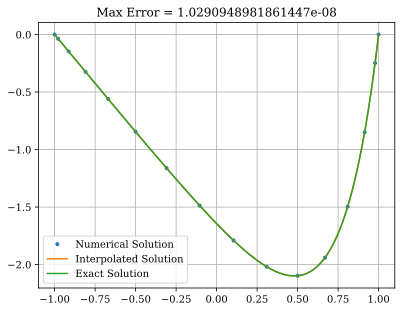

In [7]:
# Number of grid points
N = 16

# Generate Chebyshev differentiation matrices
x, DM = chebdif(N, 2)
D2 = DM[1]
D2 = D2[1:-1, 1:-1]  # Apply boundary conditions by removing the first and last rows and columns

# Define the right-hand side function
f = np.exp(4 * x[1:-1])

# Solve the Poisson equation
u = np.linalg.solve(D2, f)
u = np.hstack([0, u, 0])  # Add boundary conditions to the solution

# Plot the solution
fig, ax = plt.subplots()
ax.plot(x, u, '.', label='Numerical Solution')

# Interpolate grid data for a smoother plot
xx = np.linspace(-1, 1, 100)
uu = np.polyval(np.polyfit(x, u, N), xx)
ax.plot(xx, uu, label='Interpolated Solution')

# Plot the exact solution
exact = (np.exp(4 * xx) - np.sinh(4) * xx - np.cosh(4)) / 16
ax.plot(xx, exact, label='Exact Solution')

# Add grid, title, and legend
ax.grid(True)
ax.set_title('Max Error = ' + str(np.linalg.norm(uu - exact, np.inf)))
ax.legend()

# Show the plot
plt.show()

### Boundary Conditions in Numerical PDE Solutions

#### Dirichlet Boundary Conditions

Dirichlet boundary conditions specify the values of the solution at the boundaries of the domain. For example, consider the Poisson equation:

$$
\frac{d^2 u}{dx^2} = f(x), \quad \text{for } a < x < b,
$$

with Dirichlet boundary conditions:

$$
u(a) = u_a, \quad u(b) = u_b.
$$

These conditions ensure that the solution is uniquely determined by both the differential equation and the specified boundary values.

In numerical methods, Dirichlet boundary conditions can be enforced using two common approaches:

1. **Modifying the System Matrix:**

   Directly incorporate the boundary conditions into the discretization matrix. Set the first and last rows of the matrix to zero except for a one on the diagonal:

   $$
   \text{Matrix row at } x = a: \quad [1, 0, 0, \dots, 0] \\
   \text{Matrix row at } x = b: \quad [0, 0, \dots, 0, 1]
   $$

   Adjust the right-hand side vector to match the boundary values:

   $$
   \text{Right-hand side at } x = a: \quad u_a \\
   \text{Right-hand side at } x = b: \quad u_b
   $$

   This approach enforces the boundary conditions directly in the system of equations, ensuring that the solution satisfies $ u(a) = u_a $ and $ u(b) = u_b $.

2. **Reducing the System Size:**

   Exclude the boundary points from the computational grid and focus on the interior nodes $ x_1, x_2, \dots, x_{N-1} $. This reduces the size of the discretization matrix to $ (N-1) \times (N-1) $. After solving the system for the interior values, assign the known boundary values explicitly:

   $$
   u(a) = u_a, \quad u(b) = u_b
   $$

   This method simplifies the system but requires careful handling to maintain accuracy near the boundaries.

#### Neumann Boundary Conditions

Neumann boundary conditions specify the derivative (flux) of the solution at the boundaries. For example:

$$
\frac{d^2 u}{dx^2} = f(x), \quad \text{for } a < x < b,
$$

with Neumann boundary conditions:

$$
\left. \frac{du}{dx} \right|_{x=a} = u'_a, \quad \left. \frac{du}{dx} \right|_{x=b} = u'_b.
$$

In this case, the solution is determined up to an additive constant because specifying the derivatives does not fix the absolute value of $ u(x) $.

To implement Neumann boundary conditions numerically:

- **Include Boundary Equations:**

  Incorporate the derivative conditions using the differentiation matrix $ D $. At the boundary points, replace the second-derivative equations with first-derivative approximations:

  - At $ x = a $:

    $$
    \left( D \mathbf{u} \right)_0 = u'_a
    $$

  - At $ x = b $:

    $$
    \left( D \mathbf{u} \right)_N = u'_b
    $$

- **Construct the Expanded System:**

  The system matrix becomes an $ (N+1) \times (N+1) $ matrix, including all nodes. It combines:

  - $ N-1 $ equations from the interior points using the second-derivative matrix $ D_N^2 $.
  - $ 2 $ equations from the boundaries using the first-derivative matrix $ D_N $.

- **Handle Zero Derivative Conditions:**

  If the boundary derivatives are zero ($ u'_a = 0 $ and $ u'_b = 0 $), the condition implies a flat slope at the boundaries. The corresponding rows in the system matrix are set using the differentiation matrix:

  $$
  \text{First row (at } x = a): \quad D \text{ (row 0)} \\
  \text{Last row (at } x = b): \quad D \text{ (row } N \text{)}
  $$

  The right-hand side entries at these positions are set to zero.

**Note:** Unlike the Dirichlet case, we generally cannot reduce the system size by removing boundary equations when dealing with Neumann conditions. The derivative at the boundary depends on the values of neighboring points, so it's essential to include all nodes in the system.

## Nonlinear 1D Boundary Value Problems

Consider the nonlinear ordinary differential equation (ODE):

$$
\frac{d^2 u}{dx^2} = e^{u}, \quad -1 < x < 1,
$$

with boundary conditions:

$$
u(-1) = 0, \quad u(1) = 0.
$$

This is a nonlinear boundary value problem due to the exponential term $ e^{u} $ on the right-hand side. Unlike linear problems, we cannot directly invert the second-order differentiation matrix $ \tilde{D}_N^2 $ to find the solution because the nonlinearity introduces dependencies that prevent us from forming a simple linear system.

### Solving the Nonlinear System with Newton's Method

To solve this problem numerically, we discretize the domain and approximate the derivatives using techniques such as finite differences or spectral methods. This discretization transforms the differential equation into a system of nonlinear algebraic equations:

$$
\tilde{D}_N^2 \, \mathbf{u} = e^{\mathbf{u}},
$$

where $ \mathbf{u} $ is the vector of unknown solution values at the interior grid points (excluding the boundary points), and $ e^{\mathbf{u}} $ denotes the element-wise exponential of the vector $ \mathbf{u} $.

Because the system is nonlinear, we employ an iterative method to find the solution. **Newton's method** is a powerful technique for solving such systems. The method involves linearizing the nonlinear equations around an initial guess and iteratively refining this guess to approach the true solution.

#### Newton's Method Steps

1. **Initialize:** Choose an initial guess $ \mathbf{u}^{(0)} $ for the solution. A common choice is to start with zeros or a simple function that satisfies the boundary conditions.

2. **Iterative Process:** For each iteration $ k = 0, 1, 2, \dots $:

   a. **Compute the Residual:**

      $$
      \mathbf{F}(\mathbf{u}^{(k)}) = \tilde{D}_N^2 \, \mathbf{u}^{(k)} - e^{\mathbf{u}^{(k)}}
      $$

   b. **Form the Jacobian Matrix:**

      The Jacobian $ \mathbf{J} $ of the system $ \mathbf{F} $ with respect to $ \mathbf{u} $ is:

      $$
      \mathbf{J} = \tilde{D}_N^2 - \operatorname{diag}\left( e^{\mathbf{u}^{(k)}} \right)
      $$

      Here, $ \operatorname{diag}\left( e^{\mathbf{u}^{(k)}} \right) $ is a diagonal matrix with entries $ e^{u_i^{(k)}} $.

   c. **Solve the Linear System for the Update $ \delta \mathbf{u} $:**

      $$
      \mathbf{J} \, \delta \mathbf{u} = -\mathbf{F}(\mathbf{u}^{(k)})
      $$

   d. **Update the Solution Estimate:**

      $$
      \mathbf{u}^{(k+1)} = \mathbf{u}^{(k)} + \delta \mathbf{u}
      $$

   e. **Check for Convergence:**

      If $ \| \delta \mathbf{u} \| $ is less than a specified tolerance (e.g., $ 10^{-6} $), the method has converged. Otherwise, proceed to the next iteration.

3. **Finalize:** Once convergence is achieved, $ \mathbf{u}^{(k+1)} $ is the numerical solution to the BVP.

#### Remarks

- **Boundary Conditions:** The boundary conditions $ u(-1) = 0 $ and $ u(1) = 0 $ are incorporated by excluding the boundary points from the vector $ \mathbf{u} $ and ensuring that the initial guess and updates respect these conditions.

- **Initial Guess:** A good initial guess can improve convergence. For this problem, starting with $ \mathbf{u}^{(0)} = \mathbf{0} $ is reasonable because it satisfies the boundary conditions.

- **Nonlinear Solver Libraries:** In practice, implementing Newton's method can be facilitated by using numerical libraries that handle sparse matrices and provide robust solvers for nonlinear systems (e.g., SciPy in Python).

- **Convergence Criteria:** Besides the update norm $ \| \delta \mathbf{u} \| $, one can also monitor the residual $ \| \mathbf{F}(\mathbf{u}^{(k+1)}) \| $ to assess convergence.

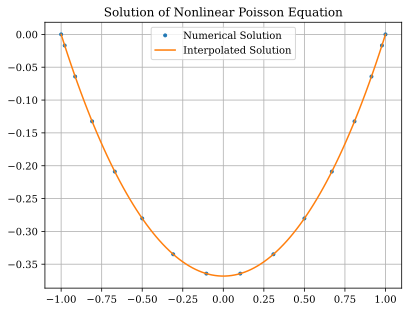

In [8]:
# Number of grid points
N = 16

# Generate Chebyshev differentiation matrices
x, DM = chebdif(N, 2)
D2 = DM[1]
D2 = jnp.array(D2[1:-1, 1:-1])  # Apply boundary conditions by removing the first and last rows and columns

# Define the right-hand side function
f = lambda u: jnp.exp(u)

# Initial guess for the solution and the update step
u, du = jnp.zeros(N-2), jnp.ones(N-2)

# Iterative solver using Newton's method
while (jnp.linalg.norm(du) / u.shape[0]) > 1e-14:
    A = D2 - jax.jacfwd(f)(u)  # Jacobian matrix
    R = f(u) - D2 @ u  # Residual
    du = jnp.linalg.solve(A, R)  # Solve for the update step
    u += du  # Update the solution

# Add boundary conditions to the solution
u = np.hstack([0, u, 0])

# Plot the solution
fig, ax = plt.subplots()
ax.plot(x, u, '.', label='Numerical Solution')

# Interpolate grid data for a smoother plot
xx = np.linspace(-1, 1, 100)
uu = np.polyval(np.polyfit(x, u, N), xx)
ax.plot(xx, uu, label='Interpolated Solution')

# Add grid, title, and legend
ax.grid(True)
ax.set_title('Solution of Nonlinear Poisson Equation')
ax.legend()

# Show the plot
plt.show()

## Eigenvalue Problems in Differential Equations

An eigenvalue problem involving a second-order ordinary differential equation (ODE) seeks functions $ u(x) $ and scalar parameters $ \lambda $ that satisfy:

$$
\frac{d^2 u}{dx^2} = \lambda f(x, u, u'), \quad \text{for } a < x < b
$$

subject to boundary conditions:

$$
u(a) = \alpha, \quad u(b) = \beta
$$

Here, $ \lambda $ (which may be complex) is called an **eigenvalue**, and the corresponding nontrivial solution $ u(x) $ is known as an **eigenfunction**. The goal is to find all pairs $ (\lambda, u(x)) $ satisfying the differential equation and boundary conditions.

When we discretize this eigenvalue problem—using methods like finite differences or spectral methods—we convert the differential equation into an algebraic eigenvalue problem. Solving this algebraic problem yields approximate eigenvalues and eigenfunctions of the original continuous system.

## Example: Eigenvalue Problem for a 1D Boundary Value Problem

Consider the following eigenvalue problem:

$$
\frac{d^2 u}{dx^2} = \lambda u, \quad \text{for } -1 < x < 1,
$$

with boundary conditions:

$$
u(-1) = 0, \quad u(1) = 0
$$

This is a classic Sturm-Liouville problem. We seek nontrivial solutions $ u(x) $ and corresponding eigenvalues $ \lambda $ satisfying both the differential equation and the homogeneous Dirichlet boundary conditions.

### Analytical Solution

The differential equation is linear with constant coefficients. To solve it, we consider two cases based on the sign of $ \lambda $:

1. **Case 1:** $ \lambda = -k^2 < 0 $

   The differential equation becomes:

   $$
   \frac{d^2 u}{dx^2} + k^2 u = 0
   $$

   The general solution is:

   $$
   u(x) = A \cos(k x) + B \sin(k x)
   $$

   Applying the boundary conditions:

   - At $ x = -1 $:

     $$
     u(-1) = A \cos(-k) + B \sin(-k) = 0
     $$

   - At $ x = 1 $:

     $$
     u(1) = A \cos(k) + B \sin(k) = 0
     $$

   These equations lead to a system that only has nontrivial solutions when $ \lambda $ takes on specific negative values. Solving for $ k $ yields:

   $$
   k_n = \frac{n \pi}{2}, \quad n = 1, 3, 5, \dots
   $$

   Thus, the eigenvalues are:

   $$
   \lambda_n = -k_n^2 = -\left( \frac{n \pi}{2} \right)^2
   $$

   The corresponding eigenfunctions are:

   $$
   u_n(x) = \sin\left( \frac{n \pi x}{2} \right)
   $$

2. **Case 2:** $ \lambda = k^2 > 0 $

   The differential equation becomes:

   $$
   \frac{d^2 u}{dx^2} - k^2 u = 0
   $$

   The general solution is:

   $$
   u(x) = C e^{k x} + D e^{-k x}
   $$

   Applying the boundary conditions leads to $ u(x) \equiv 0 $, the trivial solution. Therefore, there are no positive eigenvalues in this problem.

### Numerical Solution

To approximate the eigenvalues and eigenfunctions numerically:

1. **Discretize the Domain:**

   - Divide the interval $ [-1, 1] $ into $ N $ grid points: $ x_0 = -1, x_1, x_2, \dots, x_N = 1 $.
   - Exclude the boundary points if applying Dirichlet conditions directly.

2. **Construct the Discretized Operator:**

   - Use a finite difference approximation for the second derivative. For interior points:
     
     $$
     \frac{d^2 u}{dx^2} \approx \frac{u_{i-1} - 2 u_i + u_{i+1}}{\Delta x^2}
     $$

   - Assemble the discretized second derivative operator into a matrix $ A $.

3. **Formulate the Algebraic Eigenvalue Problem:**

   - The discretized equation becomes:

     $$
     A \mathbf{u} = \lambda \mathbf{u}
     $$

   - Here, $ \mathbf{u} $ is the vector of approximate solution values at the grid points.

4. **Apply Boundary Conditions:**

   - Enforce $ u_0 = u_N = 0 $ (Dirichlet conditions) by modifying the matrix $ A $ and the vector $ \mathbf{u} $ accordingly.

5. **Solve the Eigenvalue Problem:**

   - Use numerical algorithms (e.g., the QR algorithm) to solve the algebraic eigenvalue problem and find approximate eigenvalues $ \lambda_n $ and eigenvectors $ \mathbf{u}_n $.

### Interpreting the Numerical Results

The computed eigenvalues $ \lambda_n $ approximate the theoretical eigenvalues $ -\left( \frac{n \pi}{2} \right)^2 $. The corresponding eigenvectors $ \mathbf{u}_n $ approximate the eigenfunctions $ \sin\left( \frac{n \pi x}{2} \right) $ evaluated at the discretization points.

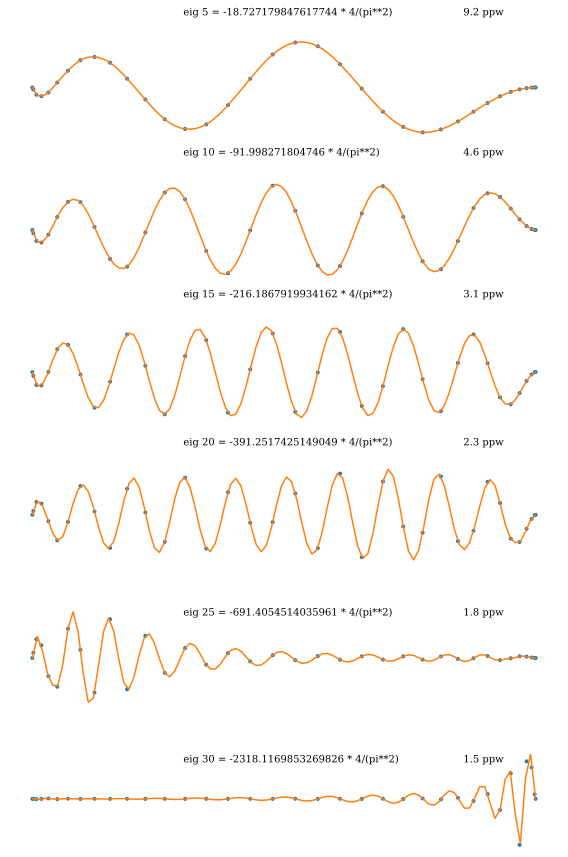

In [9]:
# Number of grid points
N = 36

# Generate Chebyshev differentiation matrices
x, DM = chebdif(N, 2)
D2 = DM[1]
D2 = D2[1:-1, 1:-1]  # Apply boundary conditions by removing the first and last rows and columns

# Compute eigenvalues and eigenvectors
lam, V = np.linalg.eigh(D2)
lam, V = lam[::-1], V[:, ::-1]  # Reverse the order for descending eigenvalues

# Create subplots
fig, axs = plt.subplots(6, 1, figsize=(8, 12))

# Plot the eigenfunctions
for j in range(5, 31, 5):
    u = np.hstack([0, V[:, j-1], 0])
    axs[j // 5 - 1].plot(x, u, '.', label=f'Eigenfunction {j}')
    
    # Interpolate grid data for a smoother plot
    xx = np.linspace(-1, 1, 100)
    uu = np.polyval(np.polyfit(x, u, N), xx)
    axs[j // 5 - 1].plot(xx, uu)
    
    # Remove axis and add text annotations
    axs[j // 5 - 1].axis('off')
    axs[j // 5 - 1].text(-0.4, 0.5, f'eig {j} = {lam[j-1] * 4 / np.pi**2} * 4/(pi**2)')
    axs[j // 5 - 1].text(0.7, 0.5, '{:4.1f} ppw'.format(4 * N / (np.pi * j)))

# Show the plot
plt.tight_layout()
plt.show()

### Accuracy Analysis in Spectral Methods for Eigenvalue Problems

In the context of the eigenvalue problem:

$$
\frac{d^2 u}{dx^2} = \lambda u, \quad -1 < x < 1, \quad u(-1) = u(1) = 0,
$$

the analytical solutions consist of eigenvalues and corresponding eigenfunctions given by:

$$
\lambda_n = -\left( \frac{n\pi}{2} \right)^2, \quad u_n(x) = \sin\left( \frac{n\pi(x + 1)}{2} \right), \quad n = 1, 2, 3, \dots
$$

When we solve this problem numerically using spectral methods, we observe varying degrees of accuracy in the computed eigenvalues depending on $ n $:

- **For $ n = 5, 10, 15 $:** The numerical eigenvalues match the exact values with high precision, often to many significant digits.
- **For $ n = 20 $:** The computed eigenvalue remains reasonably accurate, though minor errors may start to appear.
- **For $ n = 25 $:** Accuracy decreases noticeably, with the eigenvalue correct to only about one significant digit.
- **For $ n = 30 $:** The numerical eigenvalue deviates substantially from the exact value, sometimes differing by a factor of 3 or more.

#### Understanding the Decline in Accuracy

The key factor influencing this behavior is the **number of points per wavelength (ppw)** in the computational grid, particularly near $ x = 0 $ where Chebyshev grids are coarsest due to clustering of points near the endpoints.

- **Wavelength of Eigenfunctions:**
  
  The eigenfunctions $ u_n(x) = \sin\left( \frac{n\pi(x + 1)}{2} \right) $ have wavelengths inversely proportional to $ n $. Higher $ n $ values correspond to shorter wavelengths and more oscillations within the domain $ [-1, 1] $.
  
- **Grid Resolution Requirement:**
  
  To accurately resolve an oscillatory function, it is generally required to have at least **two grid points per wavelength** ($ \text{ppw} \geq 2 $). This criterion ensures that the numerical method can capture the essential features of the wave.

- **Effect of Inadequate ppw:**

  - **Sufficient ppw ($ \text{ppw} \geq 2 $):** The eigenfunction is well-resolved across the domain, and the spectral method accurately computes the eigenvalue and eigenfunction.
  - **Insufficient ppw ($ \text{ppw} < 2 $):** The grid fails to capture the rapid oscillations of the eigenfunction, especially in regions where the grid spacing is largest (near $ x = 0 $ in Chebyshev grids). This leads to significant numerical errors in the computed eigenvalues and renders the approximated eigenfunctions unreliable.

#### Implications for Spectral Methods

- **Spectral Accuracy Limitations:**
  
  Spectral methods are renowned for their exponential (spectral) convergence when approximating smooth functions. However, this convergence is contingent upon the function being adequately resolved by the grid. For higher eigenvalues (large $ n $), the associated eigenfunctions oscillate rapidly, and without sufficient grid resolution, the spectral method's accuracy deteriorates.

- **Grid Density and Computational Cost:**
  
  Increasing the number of grid points $ N $ enhances the resolution, allowing higher-frequency modes to be accurately captured. However, this comes at the cost of increased computational effort. Practitioners must balance the desire for accuracy with available computational resources.

- **Practical Recommendations:**

  - **Assess ppw Across the Domain:**
    
    Ensure that the minimum ppw requirement is met throughout the entire domain. In grids that are non-uniform (like Chebyshev grids), pay special attention to the regions with the coarsest spacing.
  
  - **Adaptive Grid Refinement:**
    
    Consider using adaptive grids or clustering points in regions where higher resolution is needed to capture rapid oscillations.
  
  - **Alternative Methods for High-Frequency Modes:**
    
    For problems where high-frequency eigenvalues are of interest, alternative numerical methods or specialized techniques may be more effective.

#### Visualization and Interpretation

- **Eigenvalue Spectrum:**
  
  Plotting the computed eigenvalues against the exact values helps visualize the accuracy across different $ n $.

- **Eigenfunctions:**
  
  Comparing the numerical and analytical eigenfunctions illustrates how well the spectral method captures the oscillatory behavior for different modes.

#### Conclusion

The accuracy of spectral methods in solving eigenvalue problems is highly dependent on the grid's ability to resolve the eigenfunctions' oscillations. Adequate grid resolution (satisfying $ \text{ppw} \geq 2 $) is crucial for obtaining accurate eigenvalues and eigenfunctions. As the eigenvalue index $ n $ increases, the associated eigenfunctions oscillate more rapidly, necessitating finer grids to maintain accuracy. Understanding and addressing the limitations imposed by grid resolution ensures reliable application of spectral methods to eigenvalue problems.

## Solving 2D Boundary Value Problems Using Spectral Methods

### Example: The 2D Poisson Equation

Consider the two-dimensional Poisson equation:

$$
\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = 10 \sin\left(8 x (y - 1)\right), \quad -1 < x, y < 1,
$$

subject to homogeneous Dirichlet boundary conditions:

$$
u = 0 \quad \text{on the boundary of the domain}.
$$

### Numerical Solution Using Kronecker Products

To solve this problem numerically, we employ spectral methods on a tensor product grid. Specifically, we use Chebyshev spectral collocation in both the $ x $ and $ y $ directions.

#### Constructing the Discrete Laplacian Operator

The key to solving a two-dimensional PDE using spectral methods lies in constructing the discrete Laplacian operator efficiently. We achieve this by utilizing the Kronecker product (denoted by $ \otimes $) of matrices. The discrete Laplacian $ L_N $ is formulated as:

$$
L_N = I \otimes \tilde{D}_N^2 + \tilde{D}_N^2 \otimes I,
$$

where:

- $ I $ is the identity matrix of size $ N $,
- $ \tilde{D}_N^2 $ is the one-dimensional second derivative matrix (modified to account for boundary conditions),
- $ \otimes $ represents the Kronecker product.

This construction allows us to extend one-dimensional operators to higher dimensions systematically.

#### Implementation Considerations

While the matrix $ L_N $ is not fully dense, it is denser than the matrices typically obtained from finite difference or finite element methods. This is because spectral methods, especially when using global basis functions like Chebyshev polynomials, inherently involve operations that couple all points in the domain.

Despite the decreased sparsity, spectral methods offer the advantage of exponential convergence for smooth problems. This means we can achieve high accuracy with relatively fewer grid points compared to traditional methods. Consequently, we can work with matrices of moderate size (dimensions in the hundreds) rather than needing to handle much larger systems (thousands or tens of thousands of unknowns).

By leveraging the spectral accuracy and the efficiency of Kronecker products, we can solve the 2D Poisson equation effectively, obtaining accurate solutions without excessive computational cost.

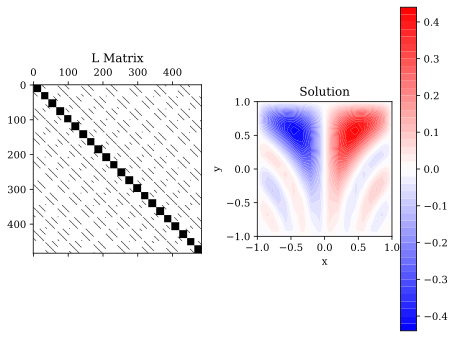

In [10]:
# Set up grids and tensor product Laplacian and solve for u:
N = 24
x, DM = chebdif(N, 2)
D2 = DM[1]
D2 = D2[1:-1, 1:-1]  # Apply boundary conditions by removing the first and last rows and columns

# Copy x to y for a square domain
y = x.copy()

# Create 2D grid and flatten it to 1D vectors
xx, yy = np.meshgrid(x[1:-1], y[1:-1])
xx, yy = xx.ravel(), yy.ravel()

# Define the right-hand side function
f = 10 * np.sin(8 * xx * (yy - 1))

# Create the identity matrix
I = np.eye(N-2)

# Construct the Laplacian using the Kronecker product
L = sp.linalg.kron(I, D2) + sp.linalg.kron(D2, I)

# Solve the linear system
u = np.linalg.solve(L, f)

# Reshape the solution back to a 2D grid
uu = np.zeros((N, N))
uu[1:-1, 1:-1] = u.reshape((N-2, N-2))
xx, yy = np.meshgrid(x, y)

# Plot the results
fig, axs = plt.subplots(1, 2, tight_layout=True)

# Plot the sparsity pattern of the Laplacian matrix
axs[0].spy(L)
axs[0].set_title('L Matrix')

# Plot the solution
contour = axs[1].contourf(xx, yy, uu, 50, cmap='bwr')
fig.colorbar(contour, ax=axs[1])
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].axis('scaled')
axs[1].set_title('Solution')

# Show the plot
plt.show()

# Fourier Transform for Periodic Grids (Periodic Boundary Conditions & Equally Spaced Grids)

## Fourier Series

A periodic and piecewise smooth function $ f(x) $ can be represented as a Fourier series, which decomposes $ f(x) $ into an infinite sum of sines and cosines with increasing frequencies. Specifically, for a function periodic on the interval $[-L, L)$, the Fourier series expansion is given by:

$$
f(x) = \frac{a_0}{2} + \sum_{k=1}^{\infty} \left[ a_k \cos\left( \frac{\pi k x}{L} \right) + b_k \sin\left( \frac{\pi k x}{L} \right) \right],
$$

where the coefficients $ a_k $ and $ b_k $ are calculated as:

$$
\begin{aligned}
a_k &= \frac{1}{L} \int_{-L}^{L} f(x) \cos\left( \frac{\pi k x}{L} \right) \, \mathrm{d} x, \\
b_k &= \frac{1}{L} \int_{-L}^{L} f(x) \sin\left( \frac{\pi k x}{L} \right) \, \mathrm{d} x.
\end{aligned}
$$

**In essence, the Fourier series expresses $ f(x) $ in terms of an infinite-dimensional orthogonal basis of sines and cosines, forming a Hilbert space.**

### Gibbs Phenomenon

While sine and cosine functions are smooth and extend over the entire real line, they can struggle to represent functions with abrupt changes or localized features efficiently. This limitation manifests as the **Gibbs phenomenon** when approximating functions with discontinuities, such as a square wave.

The Gibbs phenomenon is characterized by persistent oscillations and overshoots near points of discontinuity in the function being approximated. These oscillations do not diminish in amplitude with the addition of more terms in the Fourier series; instead, they converge to a fixed overshoot of approximately 9% of the discontinuity's jump. This indicates that Fourier series approximations may converge pointwise except at discontinuities, where they converge to the average of the left and right limits.

To address the Gibbs phenomenon and improve the representation of functions with sharp transitions, alternative basis functions, such as **wavelets**, have been developed. Wavelets provide better localization in both time (or space) and frequency domains, allowing for more efficient representation of such functions.

## Fourier Transform

While the Fourier series is ideal for periodic functions, many functions of interest are non-periodic or defined over the entire real line. The **Fourier transform** generalizes the Fourier series to non-periodic functions defined on $(-\infty, \infty)$, allowing us to analyze functions without repeating them outside a finite domain.

The Fourier transform of a function $ f(x) $ is defined as:

$$
\hat{f}(\omega) = \mathcal{F}[f(x)] = \int_{-\infty}^{\infty} f(x) \, e^{-i \omega x} \, \mathrm{d} x,
$$

with the inverse Fourier transform given by:

$$
f(x) = \mathcal{F}^{-1}[\hat{f}(\omega)] = \frac{1}{2\pi} \int_{-\infty}^{\infty} \hat{f}(\omega) \, e^{i \omega x} \, \mathrm{d} \omega.
$$

Here, $ \omega $ represents the angular frequency, and $ \hat{f}(\omega) $ is the frequency-domain representation of $ f(x) $.

The Fourier transform is particularly powerful due to its linearity and the way it simplifies the handling of differentiation and convolution operations, which become algebraic operations in the frequency domain.

### Linearity of Fourier Transforms

The Fourier transform is a linear operator, meaning that for any functions $ f(x) $ and $ g(x) $, and scalars $ \alpha $ and $ \beta $:

$$
\mathcal{F}[\alpha f(x) + \beta g(x)] = \alpha \mathcal{F}[f(x)] + \beta \mathcal{F}[g(x)].
$$

Similarly, the inverse Fourier transform is linear:

$$
\mathcal{F}^{-1}[\alpha \hat{f}(\omega) + \beta \hat{g}(\omega)] = \alpha \mathcal{F}^{-1}[\hat{f}(\omega)] + \beta \mathcal{F}^{-1}[\hat{g}(\omega)].
$$

### Parseval's Theorem

Parseval's theorem relates the total energy of a function in the time domain to the total energy in the frequency domain:

$$
\int_{-\infty}^{\infty} |\hat{f}(\omega)|^2 \, \mathrm{d} \omega = 2\pi \int_{-\infty}^{\infty} |f(x)|^2 \, \mathrm{d} x.
$$

This implies that the Fourier transform preserves the $ L_2 $-norm (up to a constant factor), maintaining the inner product between functions. This property is useful for error analysis in approximations and truncations.

### Discrete Fourier Transform (DFT) and Fast Fourier Transform (FFT)

The **Discrete Fourier Transform (DFT)** is the discrete counterpart of the Fourier transform, applied to finite sequences of data. However, computing the DFT directly requires $ \mathcal{O}(n^2) $ operations for a sequence of length $ n $, as it involves sums over all combinations of data points and frequencies.

The **Fast Fourier Transform (FFT)** is an algorithm that reduces the computational complexity to $ \mathcal{O}(n \log n) $ by exploiting symmetries in the computation. The FFT is most efficient when:

- The data points are **equally spaced**.
- The data sequence is **periodic**.
- The number of data points $ n $ is a **power of two**.

While the first two conditions follow from the nature of the DFT, having $ n $ as a power of two allows the FFT to recursively divide the problem, maximizing efficiency.

### Derivatives in the Fourier Transform and Spectral Accuracy vs. Finite Difference Methods

In finite difference methods (FDM), approximating derivatives involves local information and achieves algebraic convergence rates, with errors decreasing like $ \mathcal{O}(\Delta x^m) $, where $ \Delta x $ is the grid spacing and $ m $ depends on the method's order and the function's smoothness.

Spectral methods, by contrast, represent functions globally using basis functions like sines and cosines, allowing for high-accuracy derivative approximations using information from the entire domain. A key relationship in Fourier analysis is:

$$
\mathcal{F}\left( \frac{d^n}{dx^n} f(x) \right) = (i \omega)^n \hat{f}(\omega).
$$

This means differentiation in the spatial domain corresponds to multiplication by $ (i \omega)^n $ in the frequency domain, leading to efficient and accurate computations of derivatives.

Spectral methods exhibit **spectral accuracy**, where errors decrease exponentially with the number of grid points $ N $, especially for analytic functions. This is significantly faster than the algebraic convergence of finite difference methods. The spectral derivative effectively utilizes global information, making it a powerful tool for solving differential equations requiring high precision.

For example, consider the linear partial differential equation (PDE):

$$
u_{tt} = c u_{xx}.
$$

Applying the Fourier transform with respect to $ x $, we obtain:

$$
\hat{u}_{tt} = -c \omega^2 \hat{u},
$$

transforming the PDE into an ordinary differential equation (ODE) in time for each frequency $ \omega $. This simplifies the analysis and solution of the equation.

**Note:** While it's possible to advance linear PDEs directly in the frequency domain, nonlinear PDEs require mapping between the spatial and frequency domains at each time step due to the complexities introduced by nonlinearity.

### Chebyshev Differentiation Using the FFT

Chebyshev polynomials provide excellent approximation properties, especially near domain boundaries. Chebyshev differentiation can be performed efficiently using the FFT by mapping Chebyshev points from $[-1, 1]$ onto equally spaced points around the unit circle. This transformation leverages the computational speed of the FFT while retaining the accuracy of Chebyshev approximations.

### Integration in the Fourier Transform

Integration in the spatial domain corresponds to division by $ i \omega $ in the frequency domain:

$$
\mathcal{F}\left( \int_{-\infty}^x f(x') \, \mathrm{d} x' \right) = \frac{1}{i \omega} \hat{f}(\omega).
$$

This property facilitates the solution of integral equations and the computation of antiderivatives using the Fourier transform.

### Aliasing in the FFT and De-aliasing Techniques

**Aliasing** occurs in the discrete Fourier transform when higher frequency components are misrepresented as lower frequencies due to insufficient sampling rates. This happens because the DFT assumes periodicity and cannot distinguish frequencies beyond the Nyquist frequency (half the sampling rate).

To mitigate aliasing, **de-aliasing** methods are employed. A common technique involves zero-padding the data to increase the number of Fourier modes. For instance, we can extend the data vector to a length $ K = \frac{3}{2} N $, where $ N $ is the original number of modes. This approach is known as the **$ \frac{2}{3} $ rule**, meaning we retain $ \frac{2}{3} $ of the total modes after de-aliasing. By increasing the FFT size, we capture higher frequency components more accurately and reduce aliasing effects, which is crucial when dealing with nonlinear terms in PDEs.

### The Strategy of Fourier Spectral Methods

In Fourier spectral methods, computations can be performed either in the spatial domain or the frequency domain by utilizing the Fourier transform. Here's the general approach:

1. **Start with Spatial Data**: Begin with the function values $ v_j $ sampled at equally spaced points.
2. **Transform to Frequency Domain**: Apply the Fourier transform to obtain $ \hat{v}_k $.
3. **Perform Operations**: Compute derivatives or other operations in the frequency domain by algebraic manipulation (e.g., multiply by $ (i \omega)^n $ for the $ n $-th derivative).
4. **Inverse Transform**: Apply the inverse Fourier transform to return to the spatial domain, obtaining the result $ w_j $.

This method leverages the rapid decay of Fourier coefficients for smooth functions, ensuring that the discretization errors are minimal. For functions with $ p $ continuous derivatives, the $ \nu $-th spectral derivative error decreases like $ O(h^{p - \nu}) $, where $ h $ is the grid spacing, leading to exponential convergence for analytic functions.

### Two-Dimensional Fourier Transform

For functions of two variables $ f(x, y) $, the two-dimensional Fourier transform extends the one-dimensional case. Computationally, the 2D Fourier transform can be efficiently computed by:

1. Applying the 1D Fourier transform to each row (transforming in the $ x $-direction).
2. Applying the 1D Fourier transform to each column of the result (transforming in the $ y $-direction).

Due to the separability of the Fourier transform, the order of transforms (rows first or columns first) does not affect the final result. This approach is widely used in image processing, signal analysis, and solving PDEs in two dimensions.

## Laplace Transform

The **Laplace transform** is another integral transform closely related to the Fourier transform, particularly useful for analyzing systems and solving differential equations involving exponential growth or non-zero initial conditions. It is defined for functions $ f(t) $ on $ [0, \infty) $:

$$
F(s) = \mathcal{L}[f(t)] = \int_0^{\infty} f(t) \, e^{-s t} \, \mathrm{d} t,
$$

where $ s $ is a complex number. The Laplace transform handles a broader class of functions than the Fourier transform, including those that grow exponentially, such as $ e^{\lambda t} $, or functions like $ \sin(t) $ and $ \cos(t) $, which do not decay at infinity.

The Laplace transform converts differential equations into algebraic equations in the $ s $-domain (complex frequency domain), simplifying the process of solving initial value problems. Many properties of the Fourier transform, such as linearity and the convolution theorem, carry over to the Laplace transform, making it a powerful tool in control theory and signal processing.

## Uncertainty Principle in Time-Frequency Analysis

In time-frequency analysis, the **uncertainty principle** states that there is a fundamental limit to the simultaneous precision of a signal's representation in both time and frequency domains. Mathematically, for a signal $ f(t) $:

$$
\sigma_t \sigma_\omega \geq \frac{1}{2},
$$

where $ \sigma_t $ is the standard deviation of $ f(t) $ in time, and $ \sigma_\omega $ is the standard deviation of its frequency content. This principle implies that a signal cannot be arbitrarily localized in both time and frequency; improving resolution in one domain inherently degrades resolution in the other. This limitation influences the design of time-frequency analysis tools and affects signal processing techniques.

## Wavelets

**Wavelets** extend Fourier analysis by providing a framework for representing functions with basis functions that are localized in both time (or space) and frequency. Wavelets partially overcome the limitations imposed by the uncertainty principle by offering a multi-resolution analysis.

Starting from a **mother wavelet** $ \psi(t) $, a family of wavelet functions is generated through scaling and translation:

$$
\psi_{a, b}(t) = \frac{1}{\sqrt{|a|}} \, \psi\left( \frac{t - b}{a} \right),
$$

where:

- $ a $ is the **scale parameter**, controlling the dilation (stretching) or compression of the wavelet.
- $ b $ is the **translation parameter**, shifting the wavelet along the time axis.

These wavelet functions can form an orthogonal basis if properly constructed, allowing for efficient projection and reconstruction of signals. Wavelets are adept at capturing localized, transient features and abrupt changes in signals, making them more effective than Fourier methods for certain applications.

The **Discrete Wavelet Transform (DWT)** provides a sparse representation of signals by concentrating information into a few significant coefficients. This sparsity leads to computational efficiencies, often surpassing those of the FFT for signals with localized features.

Unlike Fourier basis functions, which are localized in frequency but extend infinitely in time, wavelets are localized in both domains. This dual localization enables wavelets to provide a more nuanced analysis of signals, especially those with non-stationary or multi-scale characteristics.

# Method of Weighted Residuals

When approximating solutions to differential equations numerically, we often replace an infinite series expansion with a finite one. This approximation implies that the differential equation cannot be satisfied exactly at every point in the domain. Instead, we aim to satisfy the equation in a finite number of ways, and the choice of these conditions defines the specific numerical method or projection operator used. For example, the **collocation method** satisfies the differential equation exactly at selected discrete points within the solution domain.

The **method of weighted residuals** provides a unifying framework to understand how different choices of weight (or test) functions in the weak or integral form of a differential equation lead to various numerical methods.

To illustrate this method, consider a differential equation defined over a domain $ \Omega $:

$$
\mathbb{F}(u) = 0,
$$

subject to appropriate initial and boundary conditions.

We approximate the solution $ u(x, t) $ using a finite sum of basis functions:

$$
u^\delta(x, t) = \sum_{j=1}^n \phi_j(x) \, \theta_j(t),
$$

or in vector form:

$$
u^\delta(x, t) = \mathbf{\Phi}^\mathrm{T}(x) \, \boldsymbol{\theta}(t),
$$

where:

- $ \mathbf{\Phi}(x) = [\phi_1(x), \phi_2(x), \dots, \phi_n(x)]^\mathrm{T} $ is a vector of basis functions defined on the interval $[a, b]$.
- $ \boldsymbol{\theta}(t) = [\theta_1(t), \theta_2(t), \dots, \theta_n(t)]^\mathrm{T} $ is a vector of coefficients to be determined.

Substituting this approximation into the differential equation introduces a **residual** $ R(x, t) $, as the approximate solution does not satisfy the equation exactly:

$$
R(x, t) = \mathbb{F}\left(u^\delta(x, t)\right) \neq 0.
$$

Our goal is to determine the coefficients $ \boldsymbol{\theta}(t) $ such that the residual is minimized in some sense. This is achieved by requiring the residual to be orthogonal to a set of weight (test) functions $ \{ w_j(x) \} $ with respect to an inner product:

$$
\left\langle w_j(x), R(x, t) \right\rangle = \int_{\Omega} w_j(x) \, R(x, t) \, \mathrm{d} x = 0, \quad j = 1, 2, \dots, n.
$$

Here, $ \left\langle \cdot , \cdot \right\rangle $ denotes the inner product over the domain $ \Omega $.

The choice of weight functions $ w_j(x) $ defines the specific numerical method:

- **Collocation Method**: $ w_j(x) = \delta(x - x_j) $, where $ \delta $ is the Dirac delta function and $ \{ x_j \} $ are the collocation points.
- **Least-Squares Method**: $ w_j(x) = \dfrac{\partial R}{\partial \theta_j} $, leading to the minimization of the squared residual $ \left\langle R, R \right\rangle $.
- **Galerkin Method**: $ w_j(x) = \phi_j(x) $, where the weight functions are the same as the basis functions.
- **Petrov-Galerkin Method**: $ w_j(x) = \psi_j(x) $, with $ \psi_j(x) \neq \phi_j(x) $, allowing for different weight and basis functions.

## Collocation Method

In the collocation method, the weight functions are Dirac delta functions at specific points:

$$
w_j(x) = \delta(x - x_j), \quad j = 1, 2, \dots, n,
$$

where $ x_j $ are predetermined collocation points within the domain $ \Omega $.

This choice enforces the residual to be zero at each collocation point:

$$
R(x_j, t) = 0, \quad j = 1, 2, \dots, n.
$$

For example, applying the collocation method to the **heat equation**:

$$
\frac{\partial u}{\partial t} = c \, \frac{\partial^2 u}{\partial x^2},
$$

and using the approximate solution $ u^\delta(x, t) $, we obtain:

$$
\sum_{j=1}^n \phi_j(x_i) \, \dot{\theta}_j(t) = c \sum_{j=1}^n \phi_j''(x_i) \, \theta_j(t), \quad i = 1, 2, \dots, n.
$$

Defining the matrices:

- $ M $ with entries $ m_{ij} = \phi_j(x_i) $,
- $ N $ with entries $ n_{ij} = \phi_j''(x_i) $,

we can rewrite the system as:

$$
M \, \dot{\boldsymbol{\theta}}(t) = c \, N \, \boldsymbol{\theta}(t).
$$

Assuming $ M $ is nonsingular, we solve for $ \dot{\boldsymbol{\theta}}(t) $:

$$
\dot{\boldsymbol{\theta}}(t) = c \, M^{-1} N \, \boldsymbol{\theta}(t).
$$

This results in a system of ordinary differential equations (ODEs) that can be integrated using standard ODE solvers. Initial conditions for $ \boldsymbol{\theta}(t) $ are obtained by matching the approximate solution $ u^\delta(x, 0) $ to the initial condition of the PDE at the collocation points $ x_i $.

## Finite Volume (Subdomain) Method

The finite volume or subdomain method involves partitioning the domain $ \Omega $ into $ n $ non-overlapping subdomains $ \{ \Omega_j \} $ such that:

$$
\bigcup_{j=1}^{n} \Omega_j = \Omega.
$$

The weight functions are defined as characteristic functions over these subdomains:

$$
w_j(x) =
\begin{cases}
1, & x \in \Omega_j, \\
0, & x \notin \Omega_j.
\end{cases}
$$

This choice ensures that the integral of the residual over each subdomain is zero, effectively balancing the differential equation within each finite volume.

## Least-Squares Method

In the least-squares method, the weight functions are the partial derivatives of the residual with respect to the coefficients:

$$
w_j(x) = \frac{\partial R}{\partial \theta_j}, \quad j = 1, 2, \dots, n.
$$

This choice minimizes the squared norm of the residual:

$$
\min_{\boldsymbol{\theta}} \left\langle R, R \right\rangle.
$$

By minimizing the global residual in the least-squares sense, we derive equations for the coefficients $ \boldsymbol{\theta}(t) $ that best fit the differential equation in an averaged sense over the domain.

## Galerkin Method

In the Galerkin method, the weight functions are chosen to be the same as the basis functions:

$$
w_j(x) = \phi_j(x), \quad j = 1, 2, \dots, n.
$$

This leads to the residual being orthogonal to the space spanned by the basis functions, which often results in symmetric and well-conditioned systems of equations.

The **Petrov-Galerkin method** generalizes this approach by allowing the weight functions $ \psi_j(x) $ to differ from the basis functions $ \phi_j(x) $:

$$
w_j(x) = \psi_j(x), \quad \psi_j(x) \neq \phi_j(x).
$$

This flexibility can be exploited to improve numerical stability or to incorporate desirable properties such as upwinding in advection-dominated problems.

## Spectral and Finite Element Methods

The method of weighted residuals does not prescribe specific basis functions $ \phi_j(x) $; however, the choice of these functions distinguishes between spectral and finite element methods:

- **Spectral Methods** use global basis functions that are nonzero over the entire domain $ \Omega $, such as trigonometric functions (sines and cosines) or orthogonal polynomials. These methods are highly accurate for smooth problems due to their global nature.
- **Finite Element Methods** employ local basis functions that are nonzero only within a finite region of the domain, typically associated with elements in a mesh (e.g., piecewise polynomials). This locality makes them suitable for complex geometries and problems with localized features.

Both spectral and finite element approaches can utilize any of the weighted residual methods described above. Additionally, it's common to combine projection methods. For example, in nonlinear spectral methods, the **pseudo-spectral method** uses collocation to handle nonlinear terms. Nonlinear products are evaluated at discrete points, taking advantage of efficient computational techniques while retaining spectral accuracy.